In [1]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def calculate_moments(image):
    mean = np.mean(image)
    std_dev = np.std(image)
    skewness = np.mean((image - mean) ** 3) / (std_dev ** 3)
    kurtosis = np.mean((image - mean) ** 4) / (std_dev ** 4) - 3
    
    return mean, std_dev, skewness, kurtosis

def calculate_color_moments(image, color_space):
    converted_image = cv2.cvtColor(image, color_space)
    components_moments = [calculate_moments(converted_image[:, :, i]) for i in range(converted_image.shape[2])]
    color_moments = [moment for component_moments in components_moments for moment in component_moments]
    
    return color_moments

In [14]:
def extract_shape_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute gradient using Sobel operators
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude and orientation
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_orientation = np.arctan2(gradient_y, gradient_x)
    
    # Normalize gradient magnitude to [0, 1]
    normalized_gradient = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))
    
    # Extract features from circular rings
    shape_features = []
    for radius in range(1, 6):  # Five concentric rings
        ring_mask = (radius - 1 < normalized_gradient) & (normalized_gradient <= radius)
        ring_magnitudes = gradient_magnitude[ring_mask]
        ring_orientations = gradient_orientation[ring_mask]
        

        feature = calculate_moments(ring_magnitudes)
        shape_features += feature
        
        # Extract normalized polar histogram for 5 degrees angular bins
        hist, _ = np.histogram(ring_orientations, bins = np.linspace(0, 2*np.pi, 37))
        normalized_hist = hist / np.sum(hist)  # Normalize to get probabilities
        shape_features.extend(normalized_hist.tolist())
    
    return shape_features

In [15]:
# Image directories
nickels_cropped_dir = "./nickels_cropped/"
nickels_cropped_files = glob(f"{nickels_cropped_dir}/*")

quarters_cropped_dir = "./quarters_cropped/"
quarters_cropped_files = glob(f"{quarters_cropped_dir}/*")

cents_cropped_dir = "./cents_cropped/"
cents_cropped_files = glob(f"{cents_cropped_dir}/*")

In [16]:
# Example usage
image = cv2.imread(nickels_cropped_files[0])

color_space = cv2.COLOR_RGB2HSV
color_features = calculate_color_moments(image, color_space)

shape_features = extract_shape_features(image)

# Combine features from different modalities
#combined_features = color_features + shape_features

# Use combined_features for further analysis or comparison


d:\Anaconda3\envs\num_env\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda3\envs\num_env\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\Anaconda3\envs\num_env\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
d:\Anaconda3\envs\num_env\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
d:\Anaconda3\envs\num_env\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\mnv\AppData\Local\Temp\ipykernel_15108\4210872909.py:29: RuntimeWarning: invalid value encountered in divide
  normalized_hist = hi

In [19]:
pd.DataFrame(shape_features)

,0
0,88.870168
1,125.674974
2,3.020317
3,10.888395
4,0.057811
5,0.054089
6,0.054089
7,0.057329
8,0.071076
9,0.063116


In [30]:
def calculate_moments(image):
    mean = np.mean(image)
    std_dev = np.std(image)
    
    if std_dev == 0:
        skewness = 0
        kurtosis = 0
    else:
        skewness = np.mean((image - mean) ** 3) / (std_dev ** 3)
        kurtosis = np.mean((image - mean) ** 4) / (std_dev ** 4) - 3
    
    return mean, std_dev, skewness, kurtosis

def extract_shape_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute gradient using Sobel operators
    gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude and orientation
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_orientation = np.arctan2(gradient_y, gradient_x)
    
    # Normalize gradient magnitude to [0, 1]
    normalized_gradient = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))
    
    # Extract features from circular rings
    shape_features = []
    for radius in range(1, 6):  # Five concentric rings
        ring_mask = (radius - 1 < normalized_gradient) & (normalized_gradient <= radius)
        ring_magnitudes = gradient_magnitude[ring_mask]
        ring_orientations = gradient_orientation[ring_mask]
        
        print(f"Ring magnitude", ring_magnitudes)
        # Check if ring_magnitudes is not empty
        if len(ring_magnitudes) > 0:
            feature = calculate_moments(ring_magnitudes)
            print(f"Radius {radius}: ", feature)
            shape_features += feature
    
    return shape_features

In [31]:
# Example usage
image = cv2.imread(nickels_cropped_files[0])

color_space = cv2.COLOR_RGB2HSV
color_features = calculate_color_moments(image, color_space)

shape_features = extract_shape_features(image)

Ring magnitude [1.41421356 3.16227766 4.         ... 4.         3.16227766 1.41421356]
Radius 1:  (88.87016775041816, 125.67497359398334, 3.0203167271515166, 10.888395460994072)
Ring magnitude []
Ring magnitude []
Ring magnitude []
Ring magnitude []


In [27]:
temp = pd.DataFrame({"sf": shape_features})
temp[temp['sf'] > 0]

,sf
0,88.870168
1,125.674974
2,3.020317
3,10.888395


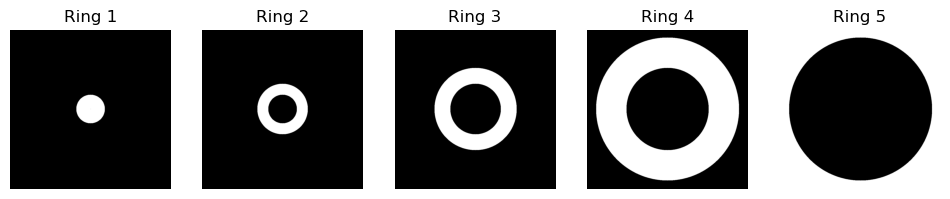

In [59]:
def create_ring_masks_const(image, num_rings):
    p = num_rings
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    masks = []

    for i in range(num_rings):
        area_ratio = (i + 1) / num_rings
        radius_outer = int(np.sqrt(area_ratio) * min(height/p, width/p))

        if i == 0:
            radius_inner = 0
        else:
            area_ratio_prev = i / num_rings
            radius_inner = int(np.sqrt(area_ratio_prev) * min(height/(p+1), width/(p+1)))

        mask = np.zeros_like(image, dtype = np.uint8)
        cv2.circle(mask, center, radius_outer, (255, 255, 255), thickness = -1)
        cv2.circle(mask, center, radius_inner, (0, 0, 0), thickness = -1)

        masks.append(mask)
        p -= 1

    return masks

image = cv2.imread(nickels_cropped_files[0])
num_rings = 5
ring_masks = create_ring_masks_const(image, num_rings)

# Plot each ring mask
plt.figure(figsize=(12, 4))
for i, mask in enumerate(ring_masks, 1):
    plt.subplot(1, num_rings, i)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title(f'Ring {i}')
    plt.axis('off')

plt.show()

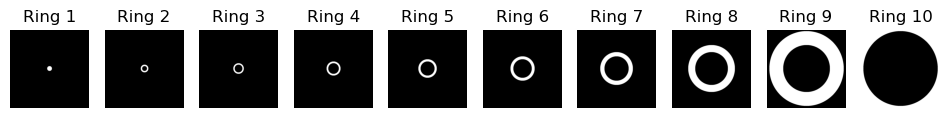

In [60]:
image = cv2.imread(nickels_cropped_files[0])
num_rings = 10
ring_masks = create_ring_masks_const(image, num_rings)

# Plot each ring mask
plt.figure(figsize=(12, 4))
for i, mask in enumerate(ring_masks, 1):
    plt.subplot(1, num_rings, i)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title(f'Ring {i}')
    plt.axis('off')

plt.show()

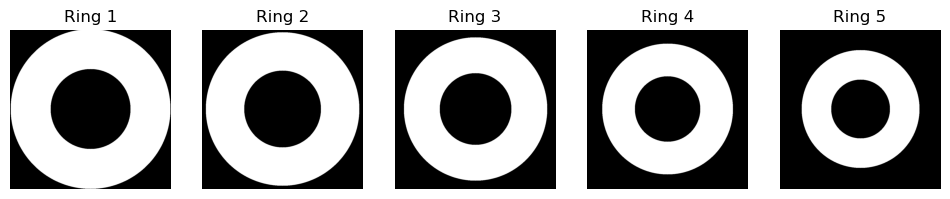

In [57]:
def create_ring_masks_with_growth_factor(image, num_rings, growth_rate = 0.8, inner_outer_ratio = 0.5):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    masks = []

    for i in range(num_rings):
        adjusted_growth_rate = growth_rate ** i
        radius_ratio = inner_outer_ratio + (1 - inner_outer_ratio) * (i / num_rings)
        radius_outer = int(adjusted_growth_rate * radius_ratio * min(height, width))

        radius_inner = int(radius_outer * inner_outer_ratio)

        mask = np.zeros_like(image, dtype=np.uint8)
        cv2.circle(mask, center, radius_outer, (255, 255, 255), thickness=-1)
        cv2.circle(mask, center, radius_inner, (0, 0, 0), thickness=-1)

        masks.append(mask)

    return masks

image = cv2.imread(nickels_cropped_files[0])
num_rings = 5
ring_masks = create_ring_masks_with_growth_factor(image, num_rings)

plt.figure(figsize = (12, 4))
for i, mask in enumerate(ring_masks, 1):
    plt.subplot(1, num_rings, i)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title(f'Ring {i}')
    plt.axis('off')

plt.show()

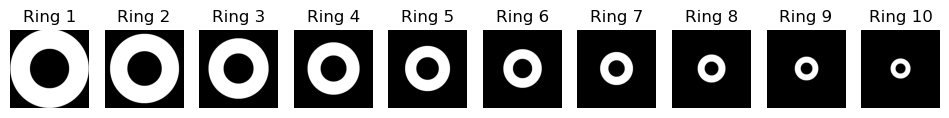

In [58]:
image = cv2.imread(nickels_cropped_files[0])
num_rings = 10
ring_masks = create_ring_masks_with_growth_factor(image, num_rings)

plt.figure(figsize = (12, 4))
for i, mask in enumerate(ring_masks, 1):
    plt.subplot(1, num_rings, i)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.title(f'Ring {i}')
    plt.axis('off')

plt.show()